# Prediksi Harga Saham Riot Games Inc.

## Pendahuluan

### 1. Latar Belakang

Riot Games adalah salah satu perusahaan terkemuka di industri permainan video, terkenal dengan judul game seperti League of Legends dan Valorant. Seiring berkembangnya ekosistem e-sports dan industri game global, nilai saham perusahaan yang berfokus pada hiburan digital seperti Riot Games memiliki daya tarik yang kuat bagi para investor. Selain berkecimpung di dunia game, Riot Games juga merambah ke industri hiburan yang lain seperti musik dan film yang kesuksesannya tak kalah dengan industri gamenya. Karena itulah pasar saham Riot Games cukup mendapat perhatian dan menjadi salah satu pilihan dari investor saham. 

Visi dari proyek ini adalah membangun program untuk memprediksi saham yang berbasis data historis untuk memberikan informasi yang lebih baik bagi investor dalam mengambil keputusan keuangan. Misinya adalah untuk mengembangkan model prediksi harga saham Riot Games dengan memanfaatkan pendekatan analisis data historis untuk memberikan informasi berharga yang didasarkan pada analisis tren pasar.


Untuk tujuan bisnis dari proyek ini adalah memaksimalkan keuntungan dan meminimalkan risiko bagi para investor dengan memberikan prediksi harga saham yang akurat dan tepat waktu. Dengan kemampuan untuk memahami pola pasar dan tren harga saham, investor dapat mengambil langkah-langkah strategis dalam perdagangan saham Riot Games. 

Pada proyek ini memiliki beberapa target bisnis, yaitu:
- Menghasilkan prediksi harga saham Riot Games dengan akurasi tinggi dalam berbagai skenario pasar.
- Memberikan rekomendasi perdagangan yang membantu investor memaksimalkan keuntungan mereka.
- Mengembangkan model prediktif yang dapat diintegrasikan ke dalam platform perdagangan saham.

Untuk mencapai hal-hal tersebut maka dibutuhkan strategi bisnis. Pada proyek ini akan mengandalkan pemanfaatan teknologi data sains, seperti machine learning dan model prediktif berbasis analisis historis, untuk mengolah data saham Riot Games. Penggunaan algoritma kecerdasan buatan akan membantu mengidentifikasi pola-pola dalam harga saham yang mungkin tidak terlihat dengan metode tradisional. Dengan demikian, strategi ini akan mengintegrasikan analisis teknis dan fundamental untuk menghasilkan prediksi yang lebih baik.

### 2. Tujuan

Proyek ini bertujuan untuk mengembangkan model prediksi harga saham Riot Games menggunakan pendekatan data sains. Dengan memanfaatkan data historis dan analisis pasar, model ini diharapkan mampu memprediksi pergerakan harga saham perusahaan dalam jangka pendek maupun panjang. Tujuan spesifiknya adalah:
- Mengidentifikasi faktor-faktor utama yang mempengaruhi harga saham Riot Games.
- Membangun model machine learning yang mampu memprediksi harga saham secara akurat.
- Mengevaluasi performa model berdasarkan berbagai metrik, seperti mean absolute error (MAE) atau root mean square error (RMSE).

### 3. Rumusan Masalah

Masalah utama yang hendak diselesaikan melalui proyek ini adalah:
- Bagaimana memanfaatkan data historis dan tren pasar untuk memprediksi harga saham Riot Games?
- Apa faktor-faktor terpenting yang mempengaruhi pergerakan harga saham Riot Games?
- Model prediksi machine learning apa yang paling efektif digunakan untuk melakukan prediksi terhadap pasar saham Riot Games?
- Seberapa akurat prediksi harga saham yang dihasilkan oleh model yang dikembangkan?

## Pembahasan

#### 1. Data Understanding

#### Pengumpulan Data

Metode yang saya gunakan untuk mendapatkan dataset yang akan digunakan untuk melakukan prediksi adalah dengan melakukan scraping dengan menggunakan _yfinance_. Untuk langkah-langkahnya adalah sebagai berikut:

- Instalasi _yfinance_

In [1]:
%pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 991.0 kB/s eta 0:00:03
      --------------------------------------- 0.0/3.0 MB 991.0 kB/s eta 0:00:03
      --------------------------------------- 0.0/3.0 MB 991.0 kB/s eta 0:00:03
     - -------------------------------------- 0.1/3.0 MB 654.9 kB/s eta 0:00:05
     - -------------------------------------- 0.1/3.0 MB 563.7 kB/s eta 0:00:06
     -- ------------------------------------- 0.2/3.0 MB 614.4 kB/s eta 0:00:05
     -- ------------------------------------- 0.2/3.0 MB 619.5 kB/s eta 0:00:05
     -- ------------------------------------- 0.2/3.0 MB 619.5 kB/s eta 0:00:05
     -- ------------------------------------- 0.2/3.0 MB 619.5 kB/s eta 0:00:05
     -- ------------------------------------- 0.2/3.0 MB 619.5 kB/s eta 0:00:05
     -- ------------------------------------- 0.2/3.0 MB 619.5 kB/s eta 0:00:05
     -- ------------------------------------- 0.2


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


- Import _yfinance_ dan _pandas_

In [3]:
import yfinance as yf 
import pandas as pd 

# Mengunduh data saham RIOT
ticker = 'RIOT'

# Mengambil data historis saham (yyyy-mm-dd)
data = yf.download(ticker, start='2020-01-01', end='2023-12-31')

# Menyimpan data ke file CSV
data.to_csv('RiotStock.csv')

# Menampilkan 5 baris pertama dari data
print(data.head())

[*********************100%***********************]  1 of 1 completed

            Open  High   Low  Close  Adj Close   Volume
Date                                                   
2020-01-02  1.14  1.23  1.13   1.22       1.22   915700
2020-01-03  1.22  1.22  1.14   1.18       1.18   467200
2020-01-06  1.23  1.30  1.20   1.30       1.30   981200
2020-01-07  1.39  1.50  1.33   1.49       1.49  3313600
2020-01-08  1.54  1.54  1.29   1.37       1.37  1792300


#### Deskripsi Dataset

Pada proyek ini saya dataset yang digunakan adalah data yang didapat dari web _yahoo finance_. Dataset ini berisi data historis saham Riot Games Inc. Dataset ini berisikan fitur fitur yang nantinya akan digunakan untuk melakukan prediksi.  

#### Deskripsi Fitur

- Date = Berisi tanggal data saham yang dicatat. Tipe data yang digunakan adalah kategorikal.
- Open = Berisi harga pembukaan saham ketika saham mulai diperdagangkan di pasar saham. Tipe data yang digunakan adalah numerik.
- High = Berisi harga tertinggi saham yang dicapai pada hari tersebut. Tipe data yang digunakan adalah numerik.
- Low = Berisi harga terendah saham yang dicapai pada hari tersebut. Tipe data yang digunakan adalah numerik.
- Close = Berisi harga penutupan saham ketika saham terakhir kali diperdagangkan di pasar saham. Tipe data yang digunakan adalah numerik.
- Adj Close = Berisi harga penutupan saham yang disesuaikan. Tipe data yang digunakan adalah numerik.
- Volume = Berisi jumlah total saham yang diperdagangkan pada hari tersebut. Tipe data yang digunakan adalah numerik.

### 2. Data Preprocessing

Pada bagian ini dataset akan diproses sebelum digunakan untuk membangun model. Dataset akan melalui data cleaning, pendeteksian outlier, dan pendeteksian missing value.

#### Data Cleaning

Pada proses ini dataset akan dibersihkan. Makna pembersihan pada proses ini adalah membuang fitur yang tidak digunakan dalam pembangunan model. Langkah yang dilakukan pertama kali adalah menentukan fitur mana saja yang akan dibersihkan dari sebuah dataset.

Salah satu cara untuk mengetahui fitur mana yang sebaiknya dibersihkan dari sebuah dataset adalah dengan menghitung korelasi antar fitur. Beberapa fitur memiliki nilai yang saling berhubungan, jika terdapat fitur yang memiliki nilai yang saling berhubungan maka salah satunya dapat dihapus.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Baca data
data = pd.read_csv('RiotStock.csv')

# Buat tabel kontingensi
contingency_table = pd.crosstab(data['Adj Close'], data['Close'])

# Hitung Chi-Square statistic dan p-value
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Hitung Cramer's V
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)-1
cramer_v = np.sqrt(chi2 / (n * min_dim))

# Cetak hasil
print(f"Cramer's V: {cramer_v}")

Cramer's V: 0.9999999999999999


Ketika telah menentukan fitur mana saja yang akan dibersihkan, langkah selanjutnya adalah melakukan drop terhadap fitur-fitur tersebut.

In [9]:
# Menghapus kolom  fitur yang tidak diperlukan
df = df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
df.to_csv('RiotStock_cleaned.csv')

#### Pendeteksian Outlier

Pada proses ini dataset akan dicek outlier-nya. Outlier sendiri adalah nilai yang aneh(yang paling jauh dari nilai rata-rata).

Jumlah outlier yang terdeteksi menggunakan Z-Score: 16
                Close
Date                 
2021-02-16  59.500000
2021-02-17  77.900002
2021-02-18  62.029999
2021-02-19  71.330002
2021-02-22  64.760002
2021-03-10  56.500000
2021-03-11  63.310001
2021-03-12  62.810001
2021-03-15  63.430000
2021-03-16  56.980000
2021-03-17  64.739998
2021-03-18  60.189999
2021-03-19  60.650002
2021-03-22  56.009998
2021-04-05  56.900002
2021-04-13  59.259998


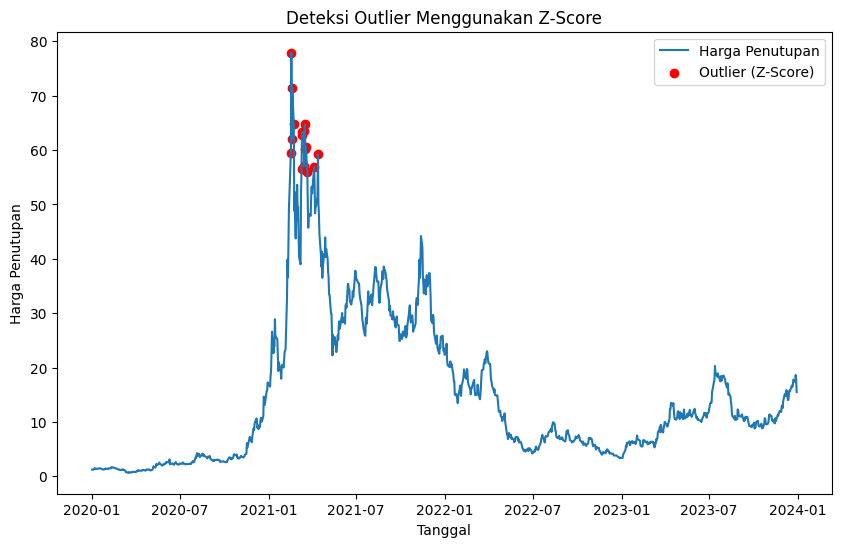

In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv('RiotStock_cleaned.csv', parse_dates=['Date'], index_col='Date')

# Menghitung Z-Score untuk kolom 'Close'
z_scores = np.abs(stats.zscore(df['Close']))

# Menentukan threshold Z-Score
threshold = 3

# Deteksi outlier (Z-Score > 3)
outliers_zscore = df[z_scores > threshold]

# Menampilkan jumlah outlier dan data outlier
print(f'Jumlah outlier yang terdeteksi menggunakan Z-Score: {len(outliers_zscore)}')
print(outliers_zscore)

# Menghapus outlier dari dataset
df_cleaned = df[z_scores <= threshold]

# Menyimpan dataset yang sudah dibersihkan ke dalam CSV
df_cleaned.to_csv('RiotStock_outliercleaned.csv')

# Visualisasi data dan outlier
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Close'], label='Harga Penutupan')
plt.scatter(outliers_zscore.index, outliers_zscore['Close'], color='red', label='Outlier (Z-Score)', marker='o')
plt.title('Deteksi Outlier Menggunakan Z-Score')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()

#### Pendeteksian Missing Value

Pada proses ini dataset akan dicek apakah memiliki missing value atau tidak. Missing value sendiri adalah nilai yang hilang, nilai yang tidak diisi karena beragam alasan.

In [18]:
import pandas as pd
df = pd.read_csv('RiotStock.csv')

# deteksi kolom yang memiliki missing value
rows_with_missing = df[df.isnull().any(axis=1)]

# Tampilkan baris dengan nilai yang hilang beserta ID, fitur, dan labelnya
print("Fitur dengan missing value:")
print(rows_with_missing)

# mendeteksi missing value
missing_values = df.isnull()
# Hitung nilai yang hilang di setiap kolom
missing_counts = missing_values.sum()

# display missing value
print("Missing value yang terdeteksi:")
print(missing_counts)

Fitur dengan missing value:
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []
Missing value yang terdeteksi:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Tidak ditemukan missing value pada dataset.

Karena dataset telah dibersihkan dari fitur yang tidak diperlukan, outlier, dan missing value, maka dataset siap untuk digunakan untuk melatih model.

### 3. Modeling

#### Menentukan Teknik Model

#### Membangun Model

### 4. Evaluasi

### 5. Deployment